# Pandas III

_June 25, 2020_

Agenda today:
- Groupby in Pandas
- Combining dataframes
- Stacking & Unstacking

# Part I. Groupby In Pandas

Sometimes we might want to calculate summary statistics for groups in dataframe. So before we explore grouping and aggregating, let's review some basic statistical methods in pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", 100)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [4]:
# check for missing value 
df.isnull().sum().sort_values(ascending = False)

continent                       23
total_litres_of_pure_alcohol     0
wine_servings                    0
spirit_servings                  0
beer_servings                    0
country                          0
dtype: int64

In [5]:
# calculate mean beer_servings
df['beer_servings'].mean()

106.16062176165804

In [6]:
# calculate summary statistics for all measurements
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [7]:
# calculate the correlation between these variables
corr = df.corr()

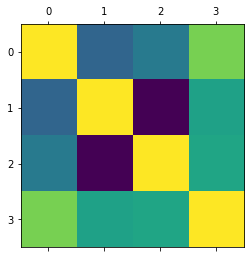

In [8]:
# visualize the correlation
plt.matshow(corr)

In [13]:
# how could we view summary statistics for categorical variable?
df['spirit_servings'].describe()
# get how many entries are in each continent
df.groupby(['continent']).count()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,,
AF,53,53,53,53,53
AS,44,44,44,44,44
EU,45,45,45,45,45
OC,16,16,16,16,16
SA,12,12,12,12,12


#### Groupby
Groupby methods in Pandas allow you to aggregate data and perform operations on them. The method can be summarized as split-apply-combine. The groupby function allow us to split the dataframe into _groups_, apply operations on them, and aggregate a final result. Let's look at some examples. 

In [14]:
# review summary statistics for each continent (use describe)
df.groupby(['continent']).describe()

beer_servings                                                      \
                  count        mean        std   min     25%    50%     75%   
continent                                                                     
AF                 53.0   61.471698  80.557816   0.0   15.00   32.0   76.00   
AS                 44.0   37.045455  49.469725   0.0    4.25   17.5   60.50   
EU                 45.0  193.777778  99.631569   0.0  127.00  219.0  270.00   
OC                 16.0   89.687500  96.641412   0.0   21.00   52.5  125.75   
SA                 12.0  175.083333  65.242845  93.0  129.50  162.5  198.00   

                 spirit_servings              ... wine_servings         \
             max           count        mean  ...           75%    max   
continent                                     ...                        
AF         376.0            53.0   16.339623  ...         13.00  233.0   
AS         247.0            44.0   60.840909  ...          8.00  123.0   
EU         361.0            45.0  132.555556  ...        195.00  370.0   
OC         306.0            16.0   58.437500  ...         23.25  212.0   
SA         333.0            12.0  114.750000  ...         98.50  221.0   

          total_litres_of_pure_alcohol                                        \
                                 count      mean       std  min   25%    50%   
continent                                                                      
AF                                53.0  3.007547  2.647557  0.0  0.70   2.30   
AS                                44.0  2.170455  2.770239  0.0  0.10   1.20   
EU                                45.0  8.617778  3.358455  0.0  6.60  10.00   
OC                                16.0  3.381250  3.345688  0.0  1.00   1.75   
SA                                12.0  6.308333  1.531166  3.8  5.25   6.85   

                         
              75%   max  
continent                
AF          4.700   9.1  
AS          2.425  11.5  
EU         10.900  14.4  
OC          6.150  10.4  
SA          7.375   8.3  

[5 rows x 32 columns]

In [15]:
# aggregate basic functions
df.groupby(['continent']).agg(['mean', 'std'])

beer_servings            spirit_servings            wine_servings  \
                   mean        std            mean        std          mean   
continent                                                                     
AF            61.471698  80.557816       16.339623  28.102794     16.264151   
AS            37.045455  49.469725       60.840909  84.362160      9.068182   
EU           193.777778  99.631569      132.555556  77.589115    142.222222   
OC            89.687500  96.641412       58.437500  70.504817     35.625000   
SA           175.083333  65.242845      114.750000  77.077440     62.416667   

                     total_litres_of_pure_alcohol            
                 std                         mean       std  
continent                                                    
AF         38.846419                     3.007547  2.647557  
AS         21.667034                     2.170455  2.770239  
EU         97.421738                     8.617778  3.358455  
OC         64.555790                     3.381250  3.345688  
SA         88.620189                     6.308333  1.531166

In [16]:
# only want sum stats for total litres grouped by continent
df.groupby(['continent'])['total_litres_of_pure_alcohol'].sum()

continent
AF    159.4
AS     95.5
EU    387.8
OC     54.1
SA     75.7
Name: total_litres_of_pure_alcohol, dtype: float64

In [17]:
# with aggregate functions and group by, we can answer questions such as "which continent drinks the most wine on average?"
df.groupby(['continent'])['wine_servings'].mean()

continent
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
SA     62.416667
Name: wine_servings, dtype: float64

#### Dataset #2 occupations

In [18]:
# read in df from this url https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user

# and set the index as user_id

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

occupations = pd.read_csv(url, sep = '|', index_col = 'user_id')

In [19]:
occupations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         943 non-null    int64 
 1   gender      943 non-null    object
 2   occupation  943 non-null    object
 3   zip_code    943 non-null    object
dtypes: int64(1), object(3)
memory usage: 36.8+ KB


In [20]:
#occupations.set_index('column')
occupations.set_index('occupation')

,age,gender,zip_code
occupation,,,
technician,24,M,85711
other,53,F,94043
writer,23,M,32067
technician,24,M,43537
other,33,F,15213
...,...,...,...
student,26,F,33319
administrator,32,M,02215
student,20,M,97229


In [21]:
# calculate the mean age per occupation, and sort the values
occupations.groupby(['occupation'])['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [22]:
# groupby multiple conditions

# for each combination of sex and occupation, show the mean age, assigned it to group by age
group_by_age = occupations.groupby(['occupation', 'gender'])['age'].mean()

In [23]:
occupations.groupby(['occupation']).gender.value_counts(normalize = True)[:,'F'].sort_values(ascending = True)*100

occupation
engineer          2.985075
technician        3.703704
retired           7.142857
programmer        9.090909
executive         9.375000
scientist         9.677419
entertainment    11.111111
lawyer           16.666667
salesman         25.000000
educator         27.368421
student          30.612245
other            34.285714
marketing        38.461538
writer           42.222222
none             44.444444
administrator    45.569620
artist           46.428571
librarian        56.862745
healthcare       68.750000
homemaker        85.714286
Name: gender, dtype: float64

In [24]:
# exercise - for each occupation, calculate the percentage of female and sort it from high to low
occupations.groupby(['occupation']).gender.value_counts(normalize=True)[:,'F'].sort_values(ascending=True)*100


occupation
engineer          2.985075
technician        3.703704
retired           7.142857
programmer        9.090909
executive         9.375000
scientist         9.677419
entertainment    11.111111
lawyer           16.666667
salesman         25.000000
educator         27.368421
student          30.612245
other            34.285714
marketing        38.461538
writer           42.222222
none             44.444444
administrator    45.569620
artist           46.428571
librarian        56.862745
healthcare       68.750000
homemaker        85.714286
Name: gender, dtype: float64

## Part II. Stacking & Unstack
Stack and unstack in Pandas provide a way for us to easily manipulate the format of our dataframes. As we see above, the row index can have hierarchy - where one level of index is nested under another. This structure can happen for columns as well. If we want to manipulate the structure of rows and columns, we need to learn stack() and unstack().

**Stack()**

<img src = 'stack.png' width = 450>

**Unstack()**

<img src = 'unstack.png' width = 450>

What you you think is happening here?

In [25]:
# turn group by age from long to wide 
group_by_age.unstack('gender')

gender,F,M
occupation,,
administrator,40.638889,37.162791
artist,30.307692,32.333333
doctor,NaN,43.571429
educator,39.115385,43.101449
engineer,29.500000,36.600000
entertainment,31.000000,29.000000
executive,44.000000,38.172414
healthcare,39.818182,45.400000
homemaker,34.166667,23.000000


In [26]:
# play around with stacking and unstacking for the above datasets
group_by_age

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

## Part III. Merging and Combining data frames 
<img src = 'merge.png' width = 400;>

Merging in Pandas mirror JOIN statement in SQL. Syntax:

df_left.merge(df_right, how, on)

#### Optional exercises & level up - the Adult dataset 

In [27]:
# read in the adults dataset 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
adults = pd.read_csv(url, header = None)

In [28]:
adults

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [29]:
columns = ['age','work_class','fnlwgt','education','education_num','marital_status','occupation','relationship','race'
           ,'sex','capital_gain','capital_loss','hours_per_week','native_country','income']
adults.columns = columns

In [30]:
# strip the white space of the strings in the df
adults.replace(' ','')
pd.set_option('display.max_rows', 50)
adults

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [53]:
# create a column called income binary, 1 if income >50k 0 otherwise
adults.income.replace(' ', '')
adults['income binary'] = adults['income'].map(lambda x: '1' if x == ' <=50K' else '0')
adults['income binary']

0        1
1        1
2        1
3        1
4        1
        ..
32556    1
32557    0
32558    1
32559    1
32560    0
Name: income binary, Length: 32561, dtype: object

In [67]:
# explore the racial distribution of income (you should use stack or unstack here)
# this show allows us to calculate the proportion of people who earned more than 50k by race
race_income = adults.groupby(['race'])['income binary'].value_counts(normalize=True)*100
race_income.unstack('income binary')

income binary,0,1
race,,
Amer-Indian-Eskimo,11.575563,88.424437
Asian-Pac-Islander,26.564004,73.435996
Black,12.387964,87.612036
Other,9.225092,90.774908
White,25.585994,74.414006


In [68]:
# explore the gender distribution of income (you should use stack or unstack here)
# this show allows us to calculate the proportion of people who earned more than 50k by gender
race_income = adults.groupby(['sex'])['income binary'].value_counts(normalize=True)*100
race_income.unstack('income binary')

income binary,0,1
sex,,
Female,10.946059,89.053941
Male,30.573658,69.426342


SyntaxError: invalid syntax (<ipython-input-75-a49dd0b7b02f>, line 2)